In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.cm import get_cmap
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import spearmanr

In [5]:
csv_dir = './Filters'

In [31]:
all_csv_files = [
    os.sep.join([csv_path, csv_file])
    for csv_path, csv_subdirs, csv_files in os.walk(csv_dir)
    for csv_file in csv_files
    if csv_file.endswith('.csv')]
    print(all_csv_files)

['./Filters\\BH02_C12D6AD99B2C.csv']


In [32]:
df= pd.read_csv('Filters\\BH02_C12D6AD99B2C.csv', parse_dates=['Date'], index_col='Date', dayfirst=True)

In [33]:
df.rename(columns = {'PM2.5, ug/m3':'PM25'}, inplace = True)

In [34]:
df['PM25'].max()

112

<AxesSubplot:xlabel='Date'>

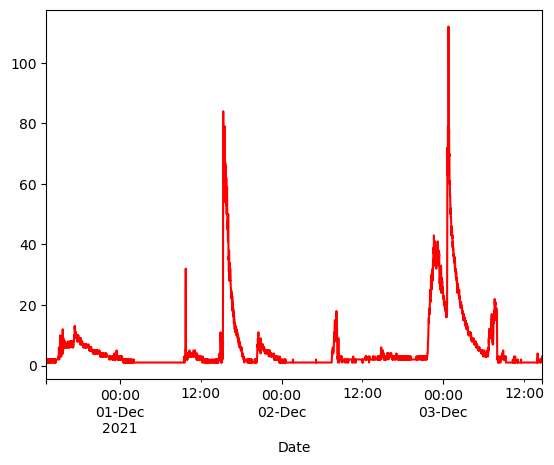

In [35]:
df.PM25.plot(color= 'red')

In [36]:
#Drop/Filter out rows where condition meets PM1=1, PM25=1 & PM10= 2 
df_filtered = df.drop(df[(df['PM1, ug/m3'] == 1) & (df['PM25'] == 1) & (df['PM10, ug/m3'] == 2)].index)
#df_filtered

In [16]:
# set a window size:
window_size = 10
# function to apply to each window:
window_func = np.nanmean

# use the data frame's 'rolling' method, and aggregate values by specified function:
rolling_mean_df = df.rolling(window=window_size).agg(window_func)

# quick look at the data:
#rolling_mean_df

In [64]:
#Perfom ttest for Raw data
from scipy.stats import ttest_rel

# Run a 2 sample ttest after:
def run_ttest(PM25):
    # expecting 10 values, compare first 5 and second 5:
    t_stat, p_value = ttest_ind(PM25[0:10], PM25[10:21])
    return p_value

# set a window size:
window_size = 20
# function to apply to each window:
window_func = run_ttest

# create new data frame for results:
ttest_df1 = pd.DataFrame()
# need to aggregate each column in the original data separately:
for col_name in df.columns:
    # get the values for this column:
    col_df = df['PM25']
    # get the mean for the whole column, which will be used as the population
    
    # apply the ttest function using a rolling window:
    # note 'center=True' so the window will extend either side of the current value:
    col_ttest_df = col_df.rolling(window=window_size, center=True).agg(window_func)
    # store the original values:
    ttest_df1[col_name] = col_df    
    # store the ttest results:
    ttest_col_name = '{0} ttest'.format(col_name)
    ttest_df1[ttest_col_name] = col_ttest_df 

# quick look at the data:
ttest_df1

,"VOC, ppm","VOC, ppm ttest",AQS,AQS ttest,"Temperature, °C","Temperature, °C ttest","Humidity, %","Humidity, % ttest","Pressure, mbar","Pressure, mbar ttest",...,Latitude,Latitude ttest,Longitude,Longitude ttest,School,School ttest,Sensor,Sensor ttest,Sensor_ID,Sensor_ID ttest
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-30 13:04:00,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,...,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
2021-11-30 13:05:00,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,...,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
2021-11-30 13:06:00,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,...,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
2021-11-30 13:07:00,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,...,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
2021-11-30 13:08:00,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,...,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-03 14:39:00,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,...,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
2021-12-03 14:40:00,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,...,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
2021-12-03 14:41:00,3,NaN,3,NaN,3,NaN,3,NaN,3,NaN,...,3,NaN,3,NaN,3,NaN,3,NaN,3,NaN


In [65]:
# Drop rows (raw values) where ttest value pvalue<0.95
df_ttest = ttest_df1[ttest_df1['PM25 ttest'] <0.95]
df_ttest

,"VOC, ppm","VOC, ppm ttest",AQS,AQS ttest,"Temperature, °C","Temperature, °C ttest","Humidity, %","Humidity, % ttest","Pressure, mbar","Pressure, mbar ttest",...,Latitude,Latitude ttest,Longitude,Longitude ttest,School,School ttest,Sensor,Sensor ttest,Sensor_ID,Sensor_ID ttest
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-30 13:14:00,1,0.673320,1,0.673320,1,0.673320,1,0.673320,1,0.673320,...,1,0.673320,1,0.673320,1,0.673320,1,0.673320,1,0.673320
2021-11-30 13:15:00,1,0.673320,1,0.673320,1,0.673320,1,0.673320,1,0.673320,...,1,0.673320,1,0.673320,1,0.673320,1,0.673320,1,0.673320
2021-11-30 13:16:00,2,0.397873,2,0.397873,2,0.397873,2,0.397873,2,0.397873,...,2,0.397873,2,0.397873,2,0.397873,2,0.397873,2,0.397873
2021-11-30 13:17:00,1,0.397873,1,0.397873,1,0.397873,1,0.397873,1,0.397873,...,1,0.397873,1,0.397873,1,0.397873,1,0.397873,1,0.397873
2021-11-30 13:18:00,1,0.080554,1,0.080554,1,0.080554,1,0.080554,1,0.080554,...,1,0.080554,1,0.080554,1,0.080554,1,0.080554,1,0.080554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-03 14:30:00,2,0.150950,2,0.150950,2,0.150950,2,0.150950,2,0.150950,...,2,0.150950,2,0.150950,2,0.150950,2,0.150950,2,0.150950
2021-12-03 14:31:00,2,0.150950,2,0.150950,2,0.150950,2,0.150950,2,0.150950,...,2,0.150950,2,0.150950,2,0.150950,2,0.150950,2,0.150950
2021-12-03 14:32:00,2,0.088644,2,0.088644,2,0.088644,2,0.088644,2,0.088644,...,2,0.088644,2,0.088644,2,0.088644,2,0.088644,2,0.088644


In [67]:
#Perfom ttest for filtered data
from scipy.stats import ttest_ind

# Run a 2 sample ttest after:
def run_ttest(PM25):
    # expecting 10 values, compare first 5 and second 5:
    t_stat, p_value = ttest_ind(PM25[0:10], PM25[10:20])
    return p_value

# set a window size:
window_size = 20
# function to apply to each window:
window_func1 = run_ttest

# create new data frame for results:
ttest_dfboth = pd.DataFrame()
# need to aggregate each column in the original data separately:

for col_name in df_filtered.columns:
    # get the values for this column:
    col_df1 = df_filtered['PM25']
    # apply the ttest function using a rolling window:
    # note 'center=True' so the window will extend either side of the current value:
    col_ttest_df1 = col_df1.rolling(window=window_size, center=True).agg(window_func1)
    # store the original values:
    ttest_dfboth[col_name] = col_df1    
    # store the ttest results:
    ttest_col_name = '{0} ttest'.format(col_name)
    ttest_dfboth[ttest_col_name] = col_ttest_df1 

# quick look at the data:
ttest_dfboth

,"VOC, ppm","VOC, ppm ttest",AQS,AQS ttest,"Temperature, °C","Temperature, °C ttest","Humidity, %","Humidity, % ttest","Pressure, mbar","Pressure, mbar ttest",...,Latitude,Latitude ttest,Longitude,Longitude ttest,School,School ttest,Sensor,Sensor ttest,Sensor_ID,Sensor_ID ttest
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-30 13:04:00,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,...,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
2021-11-30 13:05:00,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,...,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
2021-11-30 13:06:00,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,...,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
2021-11-30 13:07:00,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,...,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
2021-11-30 13:08:00,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,...,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-03 14:39:00,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,...,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
2021-12-03 14:40:00,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,...,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
2021-12-03 14:41:00,3,NaN,3,NaN,3,NaN,3,NaN,3,NaN,...,3,NaN,3,NaN,3,NaN,3,NaN,3,NaN


In [69]:
# Drop rows (filtered values) where ttest value pvalue<0.95
df_both = ttest_dfboth[ttest_dfboth['PM25 ttest'] <0.95]
df_both

,"VOC, ppm","VOC, ppm ttest",AQS,AQS ttest,"Temperature, °C","Temperature, °C ttest","Humidity, %","Humidity, % ttest","Pressure, mbar","Pressure, mbar ttest",...,Latitude,Latitude ttest,Longitude,Longitude ttest,School,School ttest,Sensor,Sensor ttest,Sensor_ID,Sensor_ID ttest
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-30 13:19:00,2,0.627837,2,0.627837,2,0.627837,2,0.627837,2,0.627837,...,2,0.627837,2,0.627837,2,0.627837,2,0.627837,2,0.627837
2021-11-30 13:20:00,1,0.627837,1,0.627837,1,0.627837,1,0.627837,1,0.627837,...,1,0.627837,1,0.627837,1,0.627837,1,0.627837,1,0.627837
2021-11-30 13:21:00,2,0.134596,2,0.134596,2,0.134596,2,0.134596,2,0.134596,...,2,0.134596,2,0.134596,2,0.134596,2,0.134596,2,0.134596
2021-11-30 13:22:00,2,0.134596,2,0.134596,2,0.134596,2,0.134596,2,0.134596,...,2,0.134596,2,0.134596,2,0.134596,2,0.134596,2,0.134596
2021-11-30 13:23:00,2,0.355346,2,0.355346,2,0.355346,2,0.355346,2,0.355346,...,2,0.355346,2,0.355346,2,0.355346,2,0.355346,2,0.355346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-03 14:30:00,2,0.150950,2,0.150950,2,0.150950,2,0.150950,2,0.150950,...,2,0.150950,2,0.150950,2,0.150950,2,0.150950,2,0.150950
2021-12-03 14:31:00,2,0.150950,2,0.150950,2,0.150950,2,0.150950,2,0.150950,...,2,0.150950,2,0.150950,2,0.150950,2,0.150950,2,0.150950
2021-12-03 14:32:00,2,0.088644,2,0.088644,2,0.088644,2,0.088644,2,0.088644,...,2,0.088644,2,0.088644,2,0.088644,2,0.088644,2,0.088644


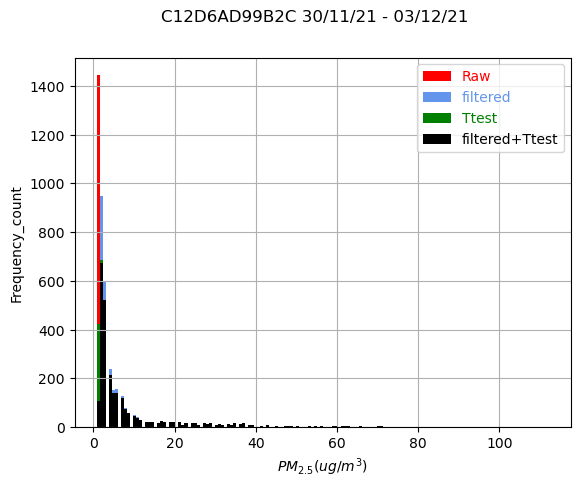

In [74]:
# Quick look at the distribution of the raw and ttest filtered data
fig,ax = plt.subplots()

df.PM25.hist(bins=150, label='Raw', color='red')
#df1.PM25.hist(bins=150, label='noise', color='pink')
df_filtered.PM25.hist(bins=150, label='filtered', color='cornflowerblue')
df_ttest.PM25.hist(bins=150, label='Ttest', color='green')
df_both.PM25.hist(bins=150, label='filtered+Ttest', color='black')

plt.suptitle('C12D6AD99B2C 30/11/21 - 03/12/21')
plt.ylabel('Frequency_count')
plt.xlabel('$PM_{2.5} (ug/m^{3})$')
plt.legend(labelcolor='linecolor')
plt.savefig('FLTHIST.png', dpi=600)

<Figure size 1500x900 with 0 Axes>

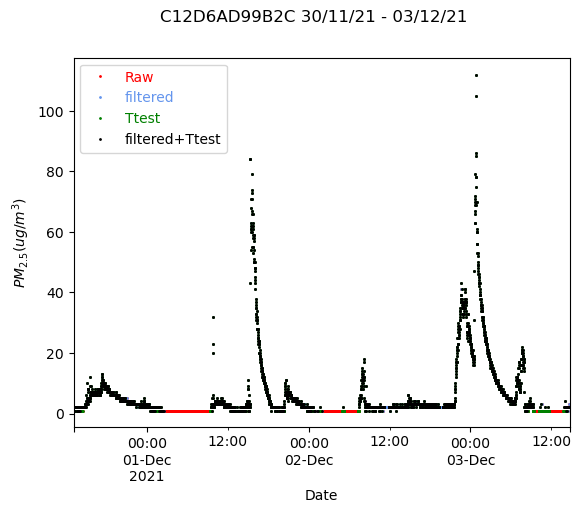

In [75]:
# Time series showing the raw, filtered data and ttest filtered data
plt.figure(figsize = (15, 9))
fig,ax = plt.subplots()

df.PM25.plot(ax=ax,ls='',marker='.', ms=2, label='Raw', color='red')
df_filtered.PM25.plot(ax=ax,ls='',marker='.', ms=2, label='filtered', color='cornflowerblue')
#df1.PM25.plot(ax=ax,ls='',marker='.', ms=1, label='noise', color='green')
df_ttest.PM25.plot(ax=ax,ls='',marker='.', ms=2, label='Ttest', color='green')
df_both.PM25.plot(ax=ax,ls='',marker='.', ms=2, label='filtered+Ttest', color='black')
plt.suptitle('C12D6AD99B2C 30/11/21 - 03/12/21')
plt.xlabel('Date')
plt.ylabel('$PM_{2.5} (ug/m^{3})$')
plt.legend(labelcolor='linecolor', fontsize = 10)
plt.savefig('FLTTS.png', dpi=600)

In [24]:
# Quick statistics for the raw data
a=df['PM25'].mean()
b=df['PM25'].median()
c=df['PM25'].std()
print('Mean:', a)
print('Median:', b)
print('Standard deviation:', c)

Mean: 6.059502262443439
Median: 2.0
Standard deviation: 10.80841147075538


In [25]:
df.describe()

,"VOC, ppm",AQS,"Temperature, °C","Humidity, %","Pressure, mbar","PM1, ug/m3",PM25,"PM10, ug/m3",Latitude,Longitude,Sensor_ID
count,4415.000000,4415.000000,4032.000000,4032.000000,4420.000000,4420.000000,4420.000000,4420.000000,0.0,0.0,4420.0
mean,1.485506,57.648698,20.851190,39.871032,977.252199,4.537783,6.059502,7.739367,NaN,NaN,40.0
std,1.395572,19.531869,2.789155,5.329271,7.390178,9.155476,10.808411,12.223940,NaN,NaN,0.0
min,0.000000,0.000000,6.000000,21.000000,960.860000,1.000000,1.000000,2.000000,NaN,NaN,40.0
25%,0.699000,45.000000,21.000000,37.000000,973.510000,1.000000,1.000000,2.000000,NaN,NaN,40.0
50%,1.458000,53.000000,22.000000,40.000000,977.895000,1.000000,2.000000,4.000000,NaN,NaN,40.0
75%,1.900000,66.000000,23.000000,42.000000,982.320000,3.000000,5.000000,6.000000,NaN,NaN,40.0
max,15.160000,98.000000,24.000000,79.000000,993.630000,105.000000,112.000000,115.000000,NaN,NaN,40.0


In [66]:
# Quick statistics for the ttest filtered data

d=df_ttest['PM25'].mean()
e=df_ttest['PM25'].median()
f=df_ttest['PM25'].std()
x=df_ttest['PM25'].max()
print('Max:', x)
print('Mean:', d)
print('Median:', e)
print('Standard deviation:', f)

Max: 112
Mean: 8.194991652754592
Median: 3.0
Standard deviation: 12.485263522865655


In [73]:
# Quick statistics for the filtered+ttest filtered data

g=df_both['PM25'].mean()
h=df_both['PM25'].median()
i=df_both['PM25'].std()
y=df_both['PM25'].max()
print('Max:', y)
print('Mean:', g)
print('Median:', h)
print('Standard deviation:', i)

Max: 112
Mean: 9.068939677781941
Median: 4.0
Standard deviation: 12.957856309674218


In [28]:
# Quick statistics for the filtered data

j=df_filtered['PM25'].mean()
k=df_filtered['PM25'].median()
l=df_filtered['PM25'].std()
z=df_filtered['PM25'].max()
print('Max:', z)
print('Mean:', j)
print('Median:', k)
print('Standard deviation:', l)


Max: 112
Mean: 8.19761828130029
Median: 3.0
Standard deviation: 12.280535255466168
